# Atahar Imtiaz

## Research question/interests

Briefly describe your research question or interests here.

**My accountability would be for the relation between A and xA, how both of these sets of data correlate to each other.** xA stands for the Expected Assists that a player is supposed to have earned throughout the season whereas A is the total number of assists the player has earned. By analyzing these 2 stats and finding a correlation we understand a player's playmaking efficiency.


## Legend

**Football jargon:**

xG = Expected Goals

xA= Expected Assists

G = Actual Goals

A = Actual Assists

xA - A = Difference between Expected Assists and Assists

**Statistics:** 

MSE = Mean Squared Error deviation

RMSE = Root Mean Squared Error deviation

In [47]:
import pandas as pd 
df = (pd.read_csv('../data/processed/Premier_League_players.xlsx.csv')
      .dropna()
      .reset_index(drop=True)
     ) 
df.head(10)

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
5,6,Kevin De-Bruyne,Manchester City,30,2214,15,8,5.95,9.05,11.26,-3.26,0.24,0.46
6,7,Jamie Vardy,Leicester,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,8,Diogo Jota,Liverpool,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,9,Wilfried Zaha,Crystal Palace,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16
9,10,Raheem Sterling,Manchester City,30,2119,13,5,15.78,-2.78,5.02,-0.02,0.67,0.21


In [48]:
df.shape

(537, 13)

In [49]:
df = (
    df
    .drop(['№', 'Apps','Min', 'G', 'xG', 'G - xG', 'xG90', 'xA90'], axis=1)
    .reset_index(drop=True)
)
df.head(10)

,Player,Team,A,xA,xA - A
0,Son Heung-Min,Tottenham,7,7.85,-0.85
1,Mohamed Salah,Liverpool,13,9.79,3.21
2,Cristiano Ronaldo,Manchester United,3,4.42,-1.42
3,Harry Kane,Tottenham,9,9.82,-0.82
4,Sadio Mané,Liverpool,2,5.27,-3.27
5,Kevin De-Bruyne,Manchester City,8,11.26,-3.26
6,Jamie Vardy,Leicester,2,1.61,0.39
7,Diogo Jota,Liverpool,4,5.87,-1.87
8,Wilfried Zaha,Crystal Palace,1,4.89,-3.89
9,Raheem Sterling,Manchester City,5,5.02,-0.02


In [50]:
df.shape

(537, 5)

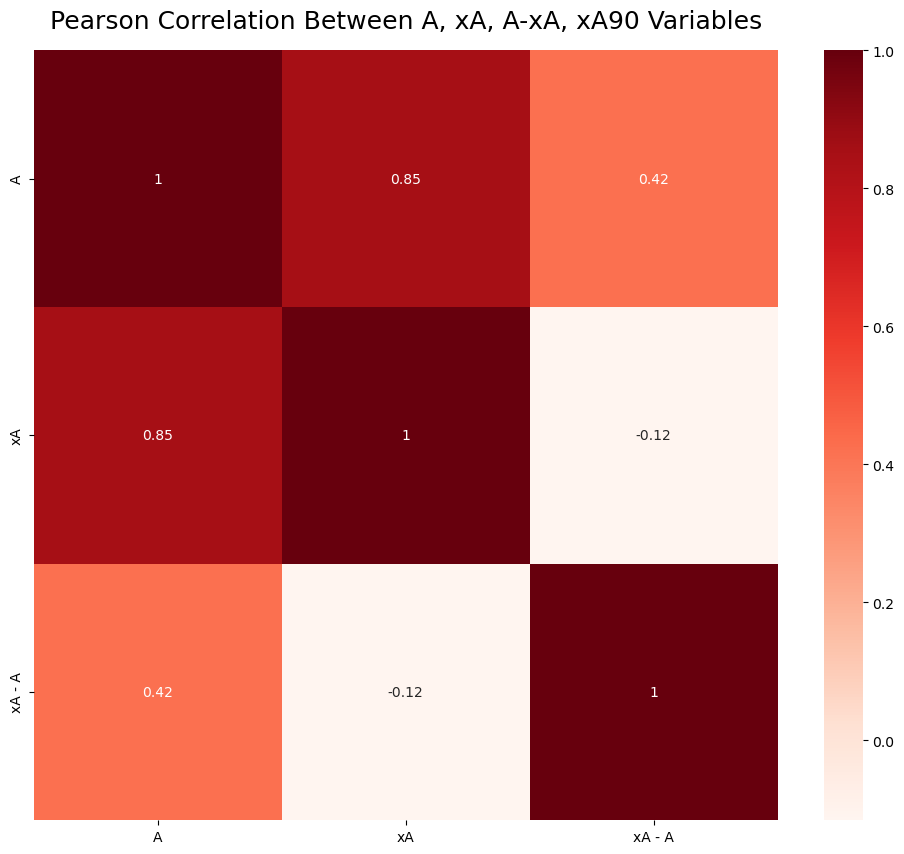

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
heatmap.set_title('Pearson Correlation Between A, xA, A-xA, xA90 Variables', fontdict={'fontsize':18}, pad=16)
plt.show()

With Pearson's Correlation Matrix we can see there is a highly positive correlation between Expected Assists (xA) and actual Assists (A). We continue exploring this correlation and try different methods of analyzing the data.

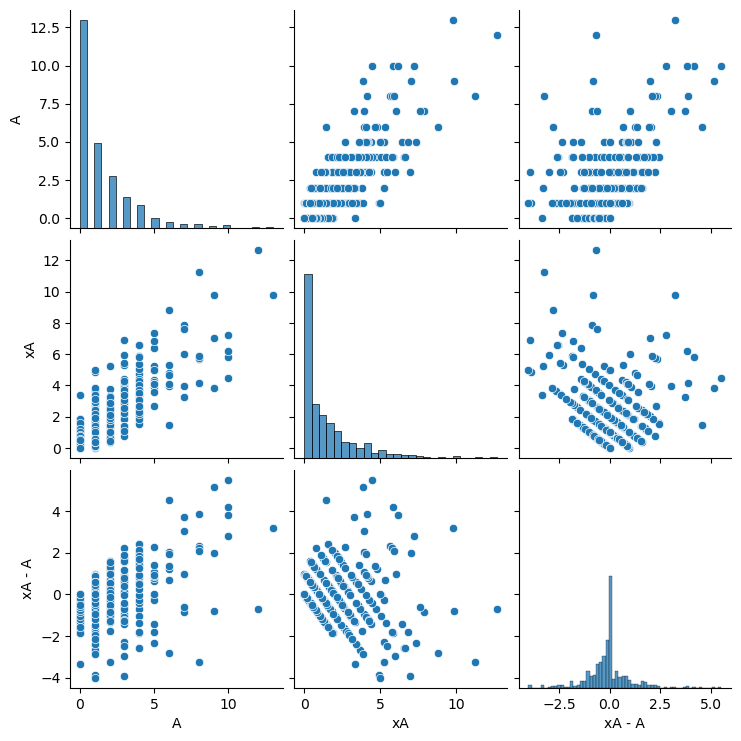

In [20]:
sns.pairplot(df)

This pairplot helps us identify the pattern of correlation of our variables. From the data. above it is hard to find any specific correlation pattern other than the linear dependancy of Expected Assists (xA) to Actual Assists (A).

In [21]:
df.isna()

,Player,Team,A,xA,xA - A
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
532,False,False,False,False,False
533,False,False,False,False,False
534,False,False,False,False,False
535,False,False,False,False,False


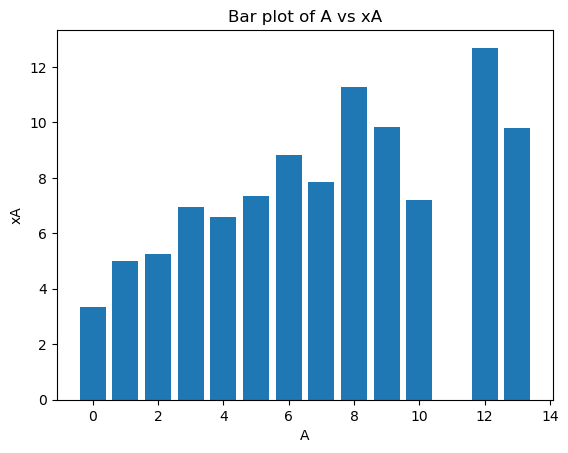

In [22]:
plt.bar(df['A'], df['xA'])

plt.xlabel('A')
plt.ylabel('xA')
plt.title('Bar plot of A vs xA')

plt.show()

We can see from the linear relationship we've established earlier between Assists and Expected Assists that players who accumulate a high number of xA (Expected Assists) tend to finish the season with a high number of A (Assists). This proves the importance of positional play so players end up being in positions that accumulate a high number of Expected Assists for them.

In [23]:
df = df.sort_values('A', ascending=False).reset_index(drop=True)

In [24]:
print(df['A'])

0      13
1      12
2      10
3      10
4      10
       ..
532     0
533     0
534     0
535     0
536     0
Name: A, Length: 537, dtype: int64


In [25]:
df = df[['Player', 'A', 'xA', 'xA - A']]
df2 = df.iloc[:10, :]
df2 = df2.reset_index(drop=True)

In [26]:
print(df2)

                   Player   A     xA  xA - A
0           Mohamed Salah  13   9.79    3.21
1  Trent Alexander-Arnold  12  12.69   -0.69
2             Mason Mount  10   7.21    2.79
3           Harvey Barnes  10   4.48    5.52
4        Andrew Robertson  10   6.20    3.80
5            Jarrod Bowen  10   5.82    4.18
6             Reece James   9   7.03    1.97
7              Paul Pogba   9   3.84    5.16
8              Harry Kane   9   9.82   -0.82
9         Michail Antonio   8   5.77    2.23


<Axes: title={'center': 'Countplot of xA'}, xlabel='xA', ylabel='count'>

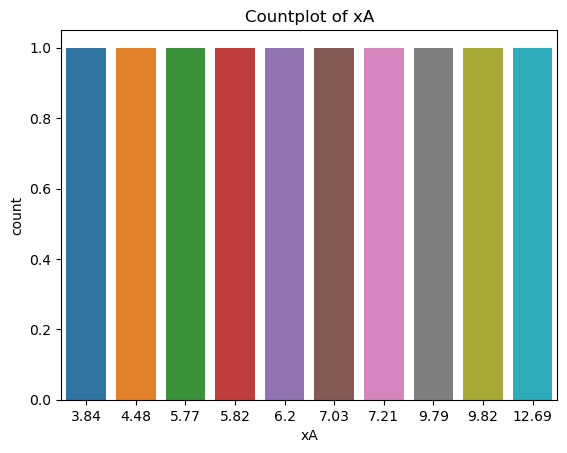

In [27]:
plt.title('Countplot of xA')
sns.countplot(x=df2["xA"])

This is a countplot of the top 10 players with most amount of assists and how many Expected Assists they've accumulated over the season. From this data we can see that Paul Pogba who accumulated an Expected Assist of 3.84 performed substantially and overperformed in order to finish with actual Assists earned being 9. Only 3 assists behind the 2nd highest player with assissts Trent Alexander-Arnold who finished the season with almost 4 times as many Expected Assists.

<Axes: title={'center': 'Countplot of A'}, xlabel='count', ylabel='A'>

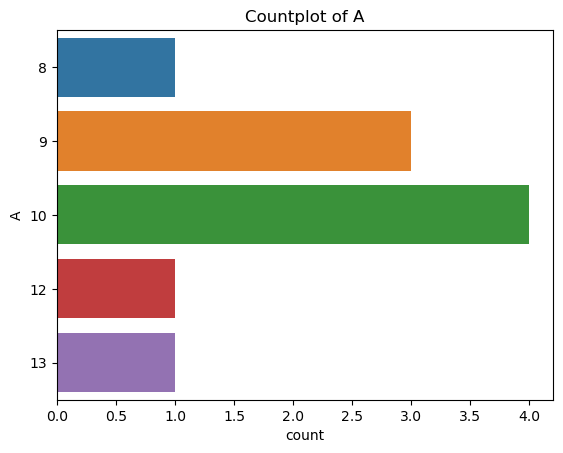

In [28]:
plt.title('Countplot of A')
sns.countplot(y=df2["A"])

This countplot of assists helps us understand how the top players are performing by their Actual Assist numbers. We can see from the plot that there are 4 players with 10 assists, 3 players with 9 assists and 1 player each with 8, 12 and 13 assists with 13 being the highest.

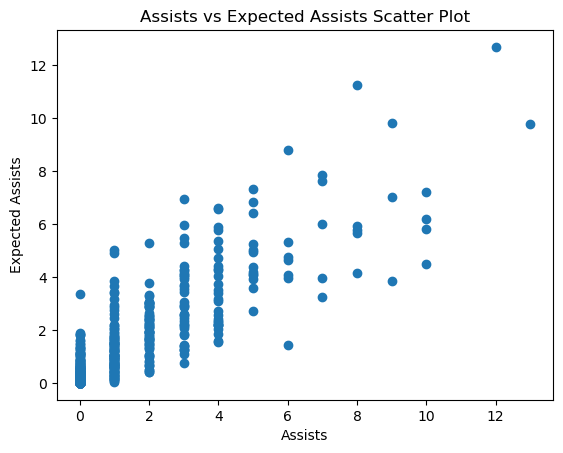

In [29]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('Expected Assists')

plt.title('Assists vs Expected Assists Scatter Plot')

plt.show()

The scatter plot provides us with another way to analyze the data, reassuring the linear dependancy between the 2 variables. We can see players with more than 12 xA and A can be considered as being outliers. 

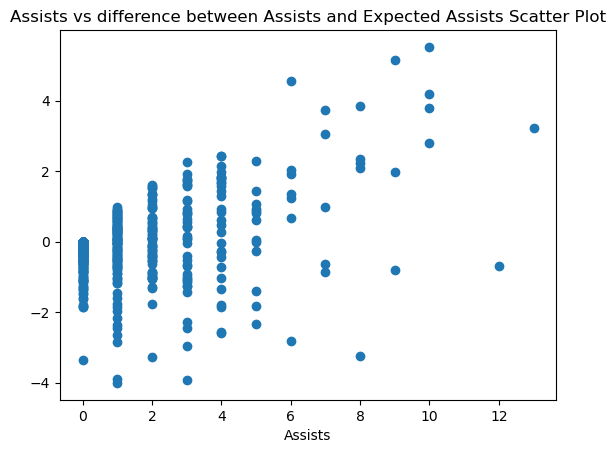

In [30]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('')

plt.title('Assists vs difference between Assists and Expected Assists Scatter Plot')

plt.show()

This scatterplot helps us analyze how many players overperformed their Expected Assists through the [xA - A] variable. Players who are positive in this Y-Axis are players who have overperformed which helps us analyze that players with a high number of assists typically overperform their Expected Assists in order to finish this high on Actual Assists.

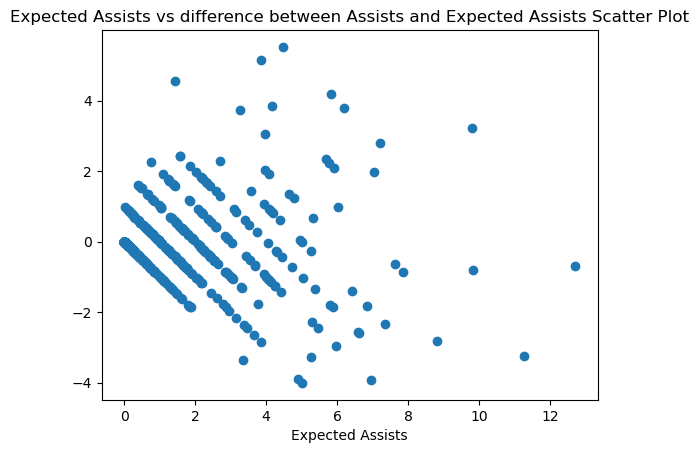

In [31]:
import matplotlib.pyplot as plt

x = df['xA']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Expected Assists')
plt.ylabel('')

plt.title('Expected Assists vs difference between Assists and Expected Assists Scatter Plot')

plt.show()

The linear dependancy isn't present with Expected Assists (xA) and the Difference (xA - A). We can see that it's hard to establish a correlation here. Only thing we can analyze from this dataset is that most players have below 4 assists, generally don't underperform/overperform either, performs pretty consistently.

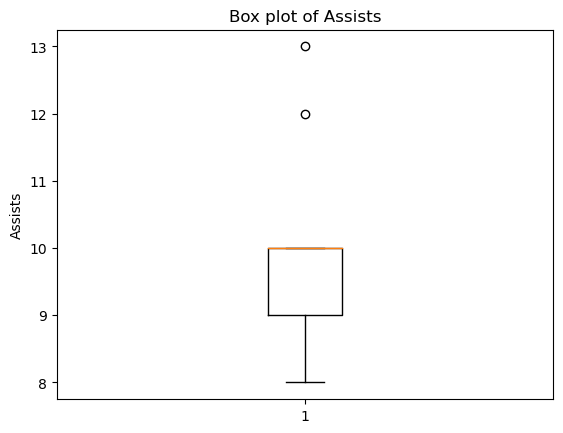

In [32]:
data = df2['A']

plt.boxplot(data)

plt.ylabel('Assists')

plt.title('Box plot of Assists')

plt.show()

We can see there are a couple of players with a very high number of assists (12, 13), performing at very high level. These players can be considered as being outliers. 

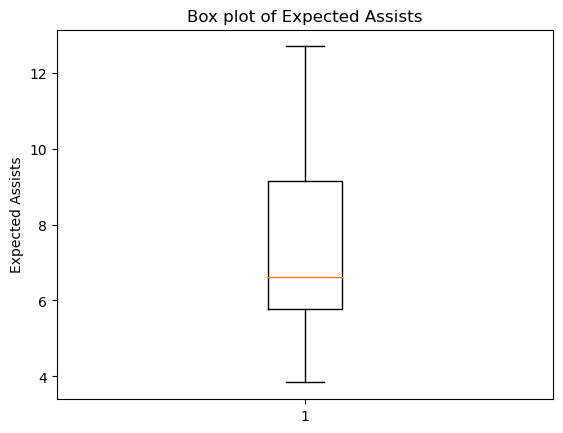

In [33]:
data = df2['xA']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of Expected Assists')

plt.show()

We can see much more consistent data here, the IQR being close to 7 and the highest number of Expected Assists (xA) being close to 13.

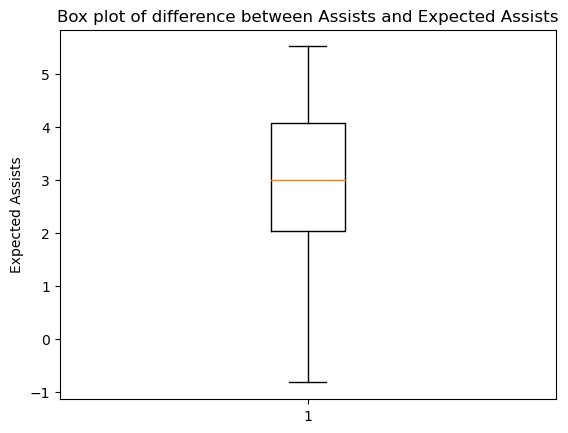

In [34]:
data = df2['xA - A']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of difference between Assists and Expected Assists')

plt.show()

Even more general we see there are barely any outliers most players perform consistently compared with their Expected Assists.

<Axes: title={'center': 'Count plot of difference between Assists and Expected Assists'}, xlabel='count', ylabel='xA - A'>

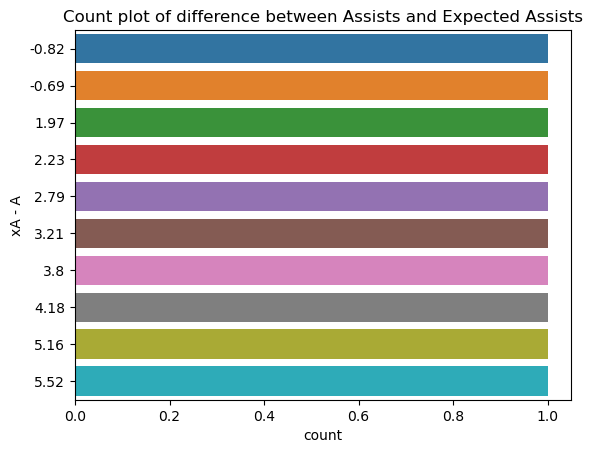

In [37]:
plt.title('Count plot of difference between Assists and Expected Assists')
sns.countplot(y=df2["xA - A"])

From this countplot we can see that amongst the top10 players in terms of Assists, the highest that a player overperformed their Expected Assists by is 5.52. This helps us understand from the top players who actually performed substantially rather than who just met their expectations. However, it's also clear to see that the top players generally overperform their xA (Expected Assists).

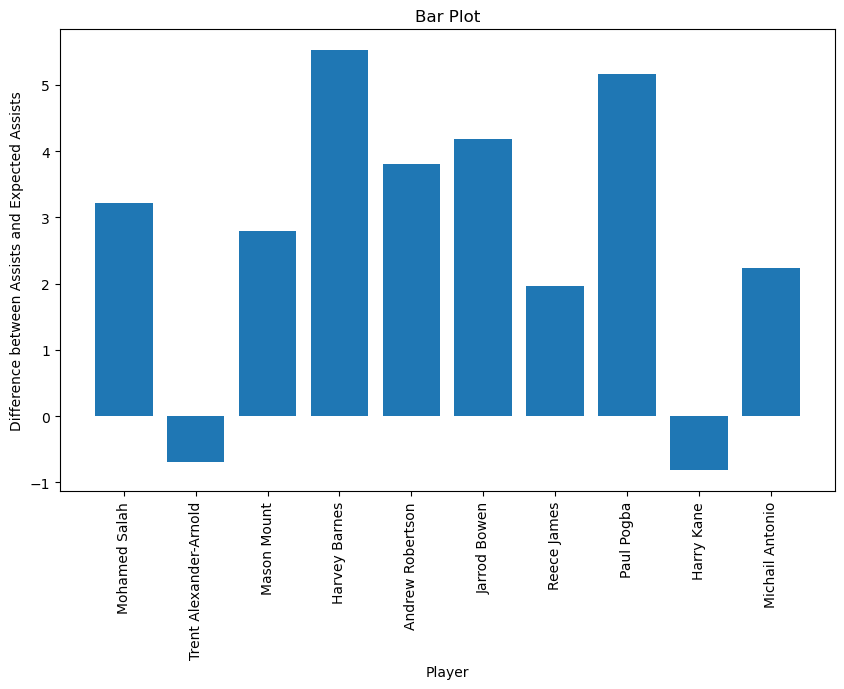

In [38]:
import matplotlib.pyplot as plt

x = df2['Player']
y = df2['xA - A']

plt.figure(figsize=(10,6)) # Increase figure size to 10 inches by 6 inches
plt.bar(x, y)
plt.xlabel('Player', fontsize=10) # Decrease font size to 10
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees for better readability
plt.ylabel('Difference between Assists and Expected Assists', fontsize=10) # Decrease font size to 10
plt.title('Bar Plot', fontsize=12) # Increase font size to 12 for title
plt.show()

Fig: Barplot of xA-A vs Players

In Conclusion, We can dictate that while the Assists and Expected Assists would be more or less similar and could hinder the overall Analysis of the data, if we dive deeper ( by finding out the difference between xA and A) we can do data analysis of the whole datasheet and how that affected the player, and their team in general.
